# Nanodegree Engenheiro de Machine Learning
## Aprendizado Supervisionado
## Projeto: Encontrando doadores para a *CharityML*

Seja bem-vindo ao segundo projeto do Nanodegree Engenheiro de Machine Learning! Neste notebook, você receberá alguns códigos de exemplo e será seu trabalho implementar as funcionalidades adicionais necessárias para a conclusão do projeto. As seções cujo cabeçalho começa com **'Implementação'** indicam que o bloco de código posterior requer funcionalidades adicionais que você deve desenvolver. Para cada parte do projeto serão fornecidas instruções e as diretrizes da implementação estarão marcadas no bloco de código com uma expressão `'TODO'`. 
Por favor, leia cuidadosamente as instruções!

Além de implementações de código, você terá de responder questões relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão terá um cabeçalho com o termo **'Questão X'**. Leia com atenção as questões e forneça respostas completas nas caixas de texto que começam com o termo **'Resposta:'**. A submissão do seu projeto será avaliada baseada nas suas resostas para cada uma das questões além das implementações que você disponibilizar.

>**Nota:** Por favor, especifique QUAL A VERSÃO DO PYTHON utilizada por você para a submissão deste notebook. As células "Code" e "Markdown" podem ser executadas utilizando o atalho do teclado **Shift + Enter**. Além disso, as células "Markdown" podem ser editadas clicando-se duas vezes na célula.


## Iniciando

Neste projeto, você utilizará diversos algoritmos de aprendizado supervisionado para modelar com precisão a remuneração de indivíduos utilizando dados coletados no censo americano de 1994. Você escolherá o algoritmo mais adequado através dos resultados preliminares e irá otimizá-lo para modelagem dos dados. O seu objetivo com esta implementação é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000. Este tipo de tarefa pode surgir em organizações sem fins lucrativos que sobrevivem de doações. Entender a remuneração de um indivíduo pode ajudar a organização o montante mais adequado para uma solicitação de doação, ou ainda se eles realmente deveriam entrar em contato com a pessoa. Enquanto pode ser uma tarefa difícil determinar a faixa de renda de uma pesssoa de maneira direta, nós podemos inferir estes valores através de outros recursos disponíveis publicamente. 

O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income) e foi cedido por Ron Kohavi e Barry Becker, após a sua publicação no artigo _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. Você pode encontrar o artigo de Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). Os dados que investigaremos aqui possuem algumas pequenas modificações se comparados com os dados originais, como por exemplo a remoção da funcionalidade `'fnlwgt'` e a remoção de registros inconsistentes.


----
## Explorando os dados
Execute a célula de código abaixo para carregas as bibliotecas Python necessárias e carregas os dados do censo. Perceba que a última coluna deste cojunto de dados, `'income'`, será o rótulo do nosso alvo (se um indivíduo possui remuneração igual ou maior do que $50,000 anualmente). Todas as outras colunas são dados de cada indívduo na base de dados do censo.

In [1]:
# Importe as bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Permite a utilização da função display() para DataFrames.

# Importação da biblioteca de visualização visuals.py
import visuals as vs

# Exibição amigável para notebooks
%matplotlib inline

# Carregando os dados do Censo
data = pd.read_csv("census.csv")

# Sucesso - Exibindo o primeiro registro
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementação: Explorando os Dados

Uma investigação superficial da massa de dados determinará quantos indivíduos se enquadram em cada grupo e nos dirá sobre o percentual destes indivúdos com remuneração anual superior à \$50,000. No código abaixo, você precisará calcular o seguinte:
- O número total de registros, `'n_records'`
- O número de indivíduos com remuneração anual superior à \$50,000, `'n_greater_50k'`.
- O número de indivíduos com remuneração anual até \$50,000, `'n_at_most_50k'`.
- O percentual de indivíduos com remuneração anual superior à \$50,000, `'greater_percent'`.

** DICA: ** Você pode precisar olhar a tabela acima para entender como os registros da coluna `'income'` estão formatados.

In [2]:
# TODO: Número total de registros.
n_records = data.shape[0]

# TODO: Número de registros com remuneração anual superior à $50,000
n_greater_50k = data.query('income == ">50K"').count()[0]

# TODO: O número de registros com remuneração anual até $50,000
n_at_most_50k = data.query('income == "<=50K"').count()[0]

# TODO: O percentual de indivíduos com remuneração anual superior à $50,000
greater_percent = n_greater_50k * 100.0 / (n_at_most_50k + n_greater_50k)

# Exibindo os resultados
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Explorando as colunas **
* **age**: contínuo. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: contínuo. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: contínuo. 
* **capital-loss**: contínuo. 
* **hours-per-week**: contínuo. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparando os dados
Antes de que os dados possam ser utilizados como input para algoritmos de machine learning, muitas vezes eles precisam ser tratados, formatados e reestruturados — este processo é conhecido como **pré-processamento**. Felizmente neste conjunto de dados não existem registros inconsistentes para tratamento, porém algumas colunas precisam ser ajustadas. Este pré-processamento pode ajudar muito com o resultado e poder de predição de quase todos os algoritmos de aprendizado.

### Transformando os principais desvios das colunas contínuas
Um conjunto de dados pode conter ao menos uma coluna onde os valores tendem a se próximar para um único número, mas também podem conter registros com o mesmo atributo contendo um valor muito maior ou muito menor do que esta tendência. Algoritmos podem ser sensíveis para estes casos de distribuição de valores e este fator pode prejudicar sua performance se a distribuição não estiver normalizada de maneira adequada. Com o conjunto de dados do censo, dois atributos se encaixam nesta descrição: '`capital-gain'` e `'capital-loss'`.

Execute o código da célula abaixo para plotar um histograma destes dois atributos. Repare na distribuição destes valores.

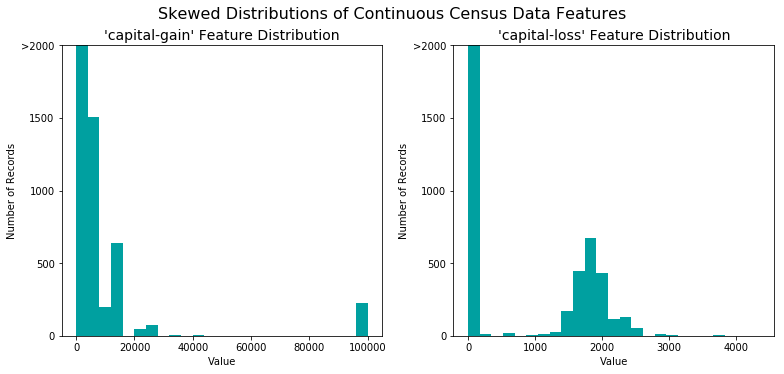

In [3]:
# Dividindo os dados entre features e coluna alvo
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualizando os principais desvios das colunas contínuas entre os dados
vs.distribution(data)

Para atributos com distribuição muito distorcida, tais como `'capital-gain'` e `'capital-loss'`, é uma prática comum aplicar uma <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transformação logarítmica</a> nos dados para que os valores muito grandes e muito pequenos não afetem a performance do algoritmo de aprendizado. Usar a transformação logarítmica reduz significativamente os limites dos valores afetados pelos outliers (valores muito grandes ou muito pequenos). Deve-se tomar cuidado ao aplicar esta transformação, poir o logaritmo de `0` é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de `0` para aplicar o logaritmo adequadamente.

Execute o código da célula abaixo para realizar a transformação nos dados e visualizar os resultados. De novo, note os valores limite e como os valores estão distribuídos.

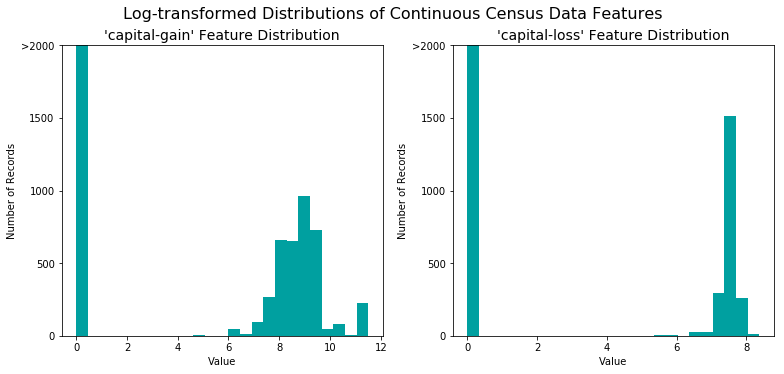

In [4]:
# Aplicando a transformação de log nos registros distorcidos.
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualizando as novas distribuições após a transformação.
vs.distribution(features_log_transformed, transformed = True)

### Normalizando atributos numéricos
Além das transformações em atributos distorcidos, é uma boa prática comum realizar algum tipo de adaptação de escala nos atributos numéricos. Ajustar a escala nos dados não modifica o formato da distribuição de cada coluna (tais como `'capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada atributo será tratado com o mesmo peso durante a aplicação de aprendizado supervisionado. Note que uma vez aplicada a escala, a observação dos dados não terá o significado original, como exemplificado abaixo.

Execute o código da célula abaixo para normalizar cada atributo numérico, nós usaremos ara isso a [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [5]:
# Importando sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicializando um aplicador de escala e aplicando em seguida aos atributos
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Exibindo um exemplo de registro com a escala aplicada
display(features_log_minmax_transform.head(n=5))

c:\python37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementação: Pré-processamento dos dados

A partir da tabela em **Explorando os dados** acima, nós podemos observar que existem diversos atributos não-numéricos para cada registro. Usualmente, algoritmos de aprendizado esperam que os inputs sejam numéricos, o que requer que os atributos não numéricos (chamados de *variáveis de categoria*) sejam convertidos. Uma maneira popular de converter as variáveis de categoria é utilizar a estratégia **one-hot encoding**. Esta estratégia cria uma variável para cada categoria possível de cada atributo não numérico. Por exemplo, assuma que `algumAtributo` possuí três valores possíveis: `A`, `B`, ou `C`. Nós então transformamos este atributo em três novos atributos: `algumAtributo_A`, `algumAtributo_B` e `algumAtributo_C`.


|   | algumAtributo |                    | algumAtributo_A | algumAtributo_B | algumAtributo_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Além disso, assim como os atributos não-numéricos, precisaremos converter a coluna alvo não-numérica, `'income'`, para valores numéricos para que o algoritmo de aprendizado funcione. Uma vez que só existem duas categorias possíveis para esta coluna ("<=50K" e ">50K"), nós podemos evitar a utilização do one-hot encoding e simplesmente transformar estas duas categorias para `0` e `1`, respectivamente. No trecho de código abaixo, você precisará implementar o seguinte:
 - Utilizar [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para realizar o one-hot encoding nos dados da `'features_log_minmax_transform'`.
 - Converter a coluna alvo `'income_raw'` para re.
   - Transforme os registros com "<=50K" para `0` e os registros com ">50K" para `1`.

In [6]:
# TODO: Utilize o one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Faça o encode da coluna 'income_raw' para valores numéricos
#income = income_raw.map({'<=50K': 0, '>50K': 1})
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Exiba o número de colunas depois do one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Descomente a linha abaixo para ver as colunas após o encode
#print(encoded)

103 total features after one-hot encoding.


### Embaralhar e dividir os dados
Agora todas as _variáveis de categoria_ foram convertidas em atributos numéricos e todos os atributos numéricos foram normalizados. Como sempre, nós agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.

Execute o código da célula abaixo para realizar divisão.

In [7]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Avaliando a performance do modelo
Nesta seção nós investigaremos quatro algoritmos diferentes e determinaremos qual deles é melhor para a modelagem dos dados. Três destes algoritmos serão algoritmos de aprendizado supervisionado de sua escolha e o quarto algoritmo é conhecido como *naive predictor*.

### Métricas e o Naive predictor

*CharityML*, equpada com sua pesquisa, sabe que os indivíduos que fazem mais do que \$50,000 possuem maior probabilidade de doar para a sua campanha de caridade. Por conta disto, a *CharityML* está particularmente interessada em predizer com acurácia quais indivíduos possuem remuneração acima de \$50,000. Parece que utilizar **acurácia (accuracy)** como uma métrica para avaliar a performance de um modelo é um parâmetro adequado. Além disso, identificar alguém que *não possui* remuneração acima de \$50,000 como alguém que recebe acima deste valor seria ruim para a *CharityML*, uma vez que eles estão procurando por indivíduos que desejam doar. Com isso, a habilidade do modelo em predizer com preisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Nós podemos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, maior ênfase é atribuída para a variável precision. Isso é chamado de **F$_{0.5}$ score** (ou F-score, simplificando).

Analisando a distribuição de classes (aqueles que possuem remuneração até \$50,000 e aqueles que possuem remuneração superior), fica claro que a maioria dos indivíduos não possui remuneração acima de \$50,000. Isto pode ter grande impacto na **acurácia (accuracy)**, uma vez que nós poderíamos simplesmente dizer *"Esta pessoa não possui remuneração acima de \$50,000"* e estar certos em boa parte das vezes, sem ao menos olhar os dados! Fazer este tipo de afirmação seria chamado de **naive**, uma vez que não consideramos nenhuma informação para balisar este argumento. É sempre importante considerar a *naive prediction* para seu conjunto de dados, para ajudar a estabelecer um benchmark para análise da performance dos modelos. Com isso, sabemos que utilizar a naive prediction não traria resultado algum: Se a predição apontasse que todas as pessoas possuem remuneração inferior à \$50,000, a *CharityML* não identificaria ninguém como potencial doador. 



#### Nota: Revisando: accuracy, precision e recall

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

### Questão 1 - Performance do Naive Predictor
* Se escolhessemos um modelo que sempre prediz que um indivíduo possui remuneração acima de $50,000, qual seria a accuracy e o F-score considerando este conjunto de dados? Você deverá utilizar o código da célula abaixo e atribuir os seus resultados para as variáveis `'accuracy'` e `'fscore'` que serão usadas posteriormente.

** Por favor, note ** que o propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comportaria. No mundo real, idealmente o seu modelo de base será o resultado de um modelo anterior ou poderia ser baseado em um paper no qual você se basearia para melhorar. Quando não houver qualquer benchmark de modelo, utilizar um naive predictor será melhor do que uma escolha aleatória.

** DICA: ** 

* Quando temos um modelo que sempre prediz '1' (e.x o indivíduo possui remuneração superior à 50k) então nosso modelo não terá Verdadeiros Negativos ou Falso Negativos, pois nós não estaremos afirmando que qualquer dos valores é negativo (ou '0') durante a predição. Com isso, nossa accuracy neste caso se torna o mesmo valor da precision (Verdadeiros positivos/ (Verdadeiros positivos + Falso positivos)) pois cada predição que fizemos com o valor '1' que deveria ter o valor '0' se torna um falso positivo; nosso denominador neste caso é o número total de registros.
* Nossa pontuação de Recall(Verdadeiros positivos/(Verdadeiros Positivos + Falsos negativos)) será 1 pois não teremos Falsos negativos.

In [8]:
'''
TP = np.sum(income) # Contando pois este é o caso "naive". Note que 'income' são os dados 'income_raw' convertidos
para valores numéricos durante o passo de pré-processamento de dados.
FP = income.count() - TP # Específico para o caso naive

TN = 0 # Sem predições negativas para o caso naive
FN = 0 # Sem predições negativas para o caso naive
'''
# TODO: Calcular accuracy, precision e recall
accuracy = np.sum(income)/income.count()
recall = np.sum(income)/(np.sum(income) + 0)
precision = np.sum(income)/(np.sum(income) + (income.count() - np.sum(income)))

# TODO: Calcular o F-score utilizando a fórmula acima para o beta = 0.5 e os valores corretos de precision e recall.
fscore = (1+(0.5*0.5))*(precision*recall/((0.5*0.5*(precision))+recall))

# Exibir os resultados 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Modelos de Aprendizado Supervisionado
**Estes são alguns dos modelos de aprendizado supervisionado disponíveis em** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees (Árvores de decisão)
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Questão 2 - Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para este problema que você irá testar nos dados do censo. Para cada modelo escolhido

- Descreva uma situação do mundo real onde este modelo pode ser utilizado. 
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?
- Quais são as fraquesas do modelo; quando ele performa mal?
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?

** DICA: **

Estruture sua resposta no mesmo formato acima^, com 4 partes para cada um dos modelos que você escolher. Por favor, inclua referências em cada uma das respostas.

**Resposta:**

**Random Forest**

- Descreva uma situação do mundo real onde este modelo pode ser utilizado.<br>
  Prever a escolha de um determinado produto para consumidores sendo a o conjunto de dados disponíveis tem uma quantidade muito  grande de colunas (gênero, idade, ocupação, endereço,...).<br>
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?<br>
  1.É um método altamente preciso e robusto devido ao número de árvores de decisão que participam do processo.<br>
  2.Não é tendencioso, uma vez que existem várias árvores e cada árvore é treinada em um subconjunto de dados.<br>
  3.É muito estável, pois mesmo que um novo ponto de dados seja introduzido no conjunto de dados, o algoritmo geral não é muito afetado, uma vez que novos dados podem afetar uma árvore, mas é muito difícil impactar todas as árvores.<br>
  4.Funciona bem quando você tem dados categóricos e numéricos e podem manipular dados ausentes.<br>
- Quais são as fraquesas do modelo; quando ele performa mal?<br>
  1.Uma grande desvantagem reside na sua complexidade. Eles exigem muito mais recursos computacionais, devido ao grande número de árvores de decisão unidas.<br>
  2.Devido à sua complexidade, eles exigem muito mais tempo para treinar do que outros algoritmos.<br>
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?<br>
  É um algoritmo altamente preciso e não é tedencioso. Como o número de dados não é tão grande, mesmo exigindo um esforço computacional grande, é recomendado devido ao seu poder de precisão.<br>
<br>

**Support Vector Machines (SVM)**

- Descreva uma situação do mundo real onde este modelo pode ser utilizado.<br>
  Classificação de imagem, como por exemplo identificar rosto em uma imagem.<br>
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?<br>
  1.Eficácia em espaços dimensionais elevados ou quando há muitos recursos.<br>
  2.Ele usa um subconjunto de pontos de treinamento na função de decisão (chamados de vetores de suporte), por isso também é eficiente na memória<br>
  3.Funciona muito bem com margem de separação clara<br>
- Quais são as fraquesas do modelo; quando ele performa mal?<br>
  1.Não tem um bom desempenho quando temos um grande conjunto de dados porque o tempo de treinamento necessário é maior<br>
  2.Ele também não funciona muito bem quando as classes de destino estão sobrepostas<br>
  3.O SVM não fornece estimativas de probabilidade diretamente, elas são calculadas usando uma validação cruzada onerosa de cinco etapas. É o método SVC relacionado da biblioteca scikit-learn do Python.<br>
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?<br>
  SVMs foram escolhidos por causa de sua eficácia dada a alta dimensionalidade. Depois de incorporar variáveis dummys, temos mais de 100 recursos em nosso conjunto de dados, portanto, os SVMs devem ser um classificador que funcione independentemente disso. Além disso, o conjunto de dados não é tão grande para ser um impedimento.
<br>

**AdaBoost**

- Descreva uma situação do mundo real onde este modelo pode ser utilizado.<br>
  Classificar emails como spam ou não baseado em um conjunto de palavras (ex: dinheiro, fácil, ganhador, prêmio)<br>
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?<br>
  1.Poucos parâmetros<br>
  2.Simples para implementar<br>
  3.Resistente a sobreajuste<br>
- Quais são as fraquesas do modelo; quando ele performa mal?<br>
  1.Sensível a dados sujos e 'outliers'<br>
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?<br>
  É um projeto com dados principalmente discretos. Temos 103 recursos aqui que o 'learner' é tratado rapidamente pela sua natureza para detectar recursos importantes.<br>
<br>

**Fontes**

- https://medium.com/@cristianofurquim/10-algoritmos-de-aprendizagem-de-m%C3%A1quinas-machine-learning-que-voc%C3%AA-precisa-saber-c49f9eefe319
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python
https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
- https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737
- https://www.cetax.com.br/blog/0-algoritmos-de-aprendizagem-de-maquina-que-os-engenheiros-precisam-de-conhecer/
- http://sas.itforum365.com.br/analytics-hub/entenda-os-4-algoritmos-de-machine-learning-e-suas-aplicacoes
- https://docs.microsoft.com/pt-br/azure/machine-learning/studio/algorithm-choice
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- http://www.cs.man.ac.uk/~nikolaon/~nikolaon_files/Introduction_to_AdaBoost.pdf
- https://www.datacamp.com/community/tutorials/adaboost-classifier-python

### Implementação - Criando um Pipeline de Treinamento e Predição
Para avaliar adequadamente a performance de cada um dos modelos que você escolheu é importante que você crie um pipeline de treinamento e predição que te permite de maneira rápida e eficiente treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste. Sua implementação aqui será utilizada na próxima seção. No bloco de código abaixo, você precisará implementar o seguinte:
 - Importar `fbeta_score` e `accuracy_score` de [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Adapte o algoritmo para os dados de treinamento e registre o tempo de treinamento. 
 - Realize predições nos dados de teste `X_test`, e também nos 300 primeiros pontos de treinamento `X_train[:300]`.
   - Registre o tempo total de predição. 
 - Calcule a acurácia tanto para o conjundo de dados de treino quanto para o conjunto de testes.
 - Calcule o F-score para os dois conjuntos de dados: treino e testes. 
   - Garanta que você configurou o parâmetro `beta`! 

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementação: Validação inicial do modelo
No código da célular, você precisará implementar o seguinte:
- Importar os três modelos de aprendizado supervisionado que você escolheu na seção anterior 
- Inicializar os três modelos e armazená-los em `'clf_A'`, `'clf_B'`, e `'clf_C'`. 
  - Utilize um `'random_state'` para cada modelo que você utilizar, caso seja fornecido.
  - **Nota:** Utilize as configurações padrão para cada modelo - você otimizará um modelo específico em uma seção posterior
- Calcule o número de registros equivalentes à 1%, 10%, e 100% dos dados de treinamento.
  - Armazene estes valores em `'samples_1'`, `'samples_10'`, e `'samples_100'` respectivamente.

**Nota:** Dependendo do algoritmo de sua escolha, a implementação abaixo pode demorar algum tempo para executar!

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples.
SVC trained on 3617 samples.


c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


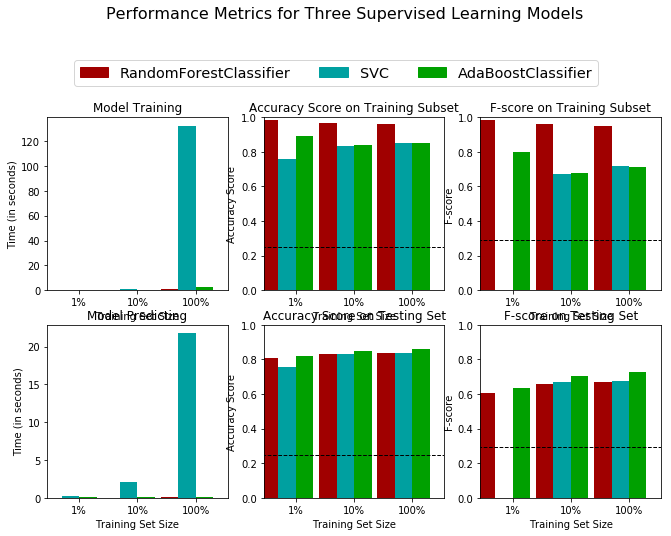

In [10]:
# TODO: Importe os três modelos de aprendizado supervisionado da sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Inicialize os três modelos
clf_A = RandomForestClassifier(random_state=100)
clf_B = SVC(random_state = 100)
clf_C = AdaBoostClassifier(random_state = 100)

# TODO: Calcule o número de amostras para 1%, 10%, e 100% dos dados de treinamento
# HINT: samples_100 é todo o conjunto de treinamento e.x.: len(y_train)
# HINT: samples_10 é 10% de samples_100
# HINT: samples_1 é 1% de samples_100
samples_100 = len(X_train)
samples_10 = int(len(X_train) * 0.1)
samples_1 = int(len(X_train) * 0.01)

# Colete os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Melhorando os resultados
Nesta seção final, você irá escolher o melhor entre os três modelos de aprendizado supervisionado para utilizar nos dados dos estudantes. Você irá então realizar uma busca grid para otimização em todo o conjunto de dados de treino (`X_train` e `y_train`) fazendo o tuning de pelo menos um parâmetro para melhorar o F-score anterior do modelo.

### Questão 3 - Escolhendo o melhor modelo

* Baseado na validação anterior, em um ou dois parágrafos explique para a *CharityML* qual dos três modelos você acredita ser o mais apropriado para a tarefa de identificar indivíduos com remuneração anual superior à \$50,000.  

** DICA: ** 
Analise o gráfico do canto inferior esquerdo da célula acima(a visualização criada através do comando `vs.evaluate(results, accuracy, fscore)`) e verifique o F score para o conjunto de testes quando 100% do conjunto de treino é utilizado. Qual modelo possui o maior score? Sua resposta deve abranger os seguintes pontos:
* métricas - F score no conjunto de testes quando 100% dos dados de treino são utilizados, 
* tempo de predição/treinamento 
* a adequação do algoritmo para este cojunto de dados.

**Resposta:**

Notamos que o algoritmo SVM é o menos adequado entre os três escolhidos, pois o f-score e accuracy são parecidos com o Random Forest, mas o tempo gasto é muito mais alto.<br>
Com base no tempo, accuracy e f-score podemoves ver que AdaBoost é o melhor entre os três. Ele possui o maior f-score, também leva um tempo bastante baixo para treinar no conjunto de dados completo.<br>
Por isso, deve escalar bem mesmo se tivermos um maior número de dados.

### Questão 4 - Descrevendo o modelo nos termos de Layman
 
* Em um ou dois parágrafos, explique para a *CharityML*, nos termos de layman, como o modelo final escolhido deveria funcionar. Garanta que você está descrevendo as principais vantagens do modelo, tais como o modo de treinar o modelo e como o modelo realiza a predição. Evite a utilização de jargões matemáticos avançados, como por exemplo a descrição de equações. 

** DICA: **

Quando estiver explicando seu modelo, cite as fontes externas utilizadas, caso utilize alguma.

**Resposta:** 

1.Inicialmente, Adaboost seleciona um subconjunto de treinamento aleatoriamente.<br>
2.Treina iterativamente o modelo de aprendizado de máquina AdaBoost selecionando o conjunto de treinamento baseado na previsão precisa do último treinamento.<br>
3.Atribui o peso maior a observações classificadas incorretas, de modo que, na próxima iteração, essas observações obterão alta probabilidade de classificação.<br>
4.Além disso, atribui o peso ao classificador treinado em cada iteração de acordo com a precisão do classificador. O classificador mais preciso terá alto peso.<br>
5.Este processo itera até que os dados de treinamento completos caibam sem qualquer erro ou até que sejam alcançados para o número máximo de estimadores especificado.<br>
6.Para classificar, executa um "voto" em todos os algoritmos de aprendizado criados.<br>

### Implementação: Tuning do modelo
Refine o modelo escolhido. Utilize uma busca grid (`GridSearchCV`) com pleo menos um parâmetro importante refinado com pelo menos 3 valores diferentes. Você precisará utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importar [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicializar o classificador escolhido por você e armazená-lo em `clf`.
 - Configurar um `random_state` se houver um disponível para o mesmo estado que você configurou anteriormente.
- Criar um dicionário dos parâmetros que você quer otimizar para o modelo escolhido.
 - Exemplo: `parâmetro = {'parâmetro' : [lista de valores]}`.
 - **Nota:** Evite otimizar o parâmetro `max_features` se este parâmetro estiver disponível! 
- Utilize `make_scorer` para criar um objeto de pontuação `fbeta_score` (com $\beta = 0.5$).
- Realize a busca gride no classificador `clf` utilizando o `'scorer'` e armazene-o na variável `grid_obj`.   
- Adeque o objeto da busca grid aos dados de treino (`X_train`, `y_train`) e armazene em `grid_fit`.

**Nota:** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para executar! 

In [11]:
# TODO: Importar 'GridSearchCV', 'make_scorer', e qualquer biblioteca necessária
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Inicializar o classificador
clf = AdaBoostClassifier(random_state = 100)

# TODO: Criar a lista de parâmetros que você quer otimizar, utilizando um dicionário, caso necessário.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[50, 120], 
              'learning_rate':[0.1, 0.5, 1.0]
             }

# TODO: Criar um objeto fbeta_score utilizando make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Realizar uma busca grid no classificador utilizando o 'scorer' como o método de score no GridSearchCV() 
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Adequar o objeto da busca grid como os dados para treinamento e encontrar os parâmetros ótimos utilizando fit() 
grid_fit = grid_obj.fit(X_train,y_train)

# Recuperar o estimador
best_clf = grid_fit.best_estimator_

# Realizar predições utilizando o modelo não otimizado e modelar
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportar os scores de antes e de depois
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8612
Final F-score on the testing data: 0.7316


### Questão 5 - Validação final do modelo

* Qual é a accuracy e o F-score do modelo otimizado utilizando os dados de testes?
* Estes scores são melhores ou piores do que o modelo antes da otimização? 
* Como os resultados do modelo otimizado se comparam aos benchmarks do naive predictor que você encontrou na **Questão 1**?_

**Nota:** Preencha a tabela abaixo com seus resultados e então responda as questões no campo **Resposta** 

#### Resultados:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8576       |     0.8612      |
| F-score        |      0.7246       |     0.7316      |


**Resposta:**

Accuracy foi de 0.8612 e o F-score foi de 0.7316 no modelo otimizado utilizando os dados de teste.<br>
Como podemos ver na tabela de resultados acima, os scores foram melhores que no do modelo antes da otimização.<br>
Os resultados foram bem melhores (Modelo Naive Predictor - Accuracy: 0.2478 | F-score: 0.2917)<br> 

----
## Importância dos atributos

Uma tarefa importante quando realizamos aprendizado supervisionado em um conjunto de dados como os dados do censo que estudamos aqui é determinar quais atributos fornecem maior poder de predição. Focando no relacionamento entre alguns poucos atributos mais importantes e na label alvo nós simplificamos muito o nosso entendimento do fenômeno, que é a coisa mais importante a se fazer. No caso deste projeto, isso significa que nós queremos identificar um pequeno número de atributos que possuem maior chance de predizer se um indivíduo possui renda anual superior à \$50,000.

Escolha um classificador da scikit-learn (e.x.: adaboost, random forests) que possua o atributo `feature_importance_`, que é uma função que calcula o ranking de importância dos atributos de acordo com o classificador escolhido. Na próxima célula python ajuste este classificador para o conjunto de treinamento e utilize este atributo para determinar os 5 atributos mais importantes do conjunto de dados do censo.

### Questão 6 - Observação da Relevância dos Atributos
Quando **Exploramos os dados**, vimos que existem treze atributos disponíveis para cada registro nos dados do censo. Destes treze atributos, quais os 5 atributos que você acredita que são os mais importantes para predição e em que ordem você os ranquearia? Por quê?

**Resposta:**

1. Occupation: Existem profissões em que se recebe mais que outras. Por exemplo, médicos em média tem uma remuneração melhor que professores.<br>
2. Education Level: Pessoas que tem um nível educacional mais elevado tendem a receber salários melhores.<br>
3. Age: Pessoas mais novas tendem a ter menos patrimônio que as mais velhas.<br>
4. Workclass: A classe a qual pertencem pode ter relação com o quanto ganham.<br>
5. Native Country: Nascidos em países mais desenvolvidos tendem a ter uma remuneração melhor.<br>

### Implementação - Extraindo a importância do atributo
Escolha um algoritmo de aprendizado supervisionado da `sciki-learn` que possui o atributo `feature_importance_` disponível. Este atributo é uma função que ranqueia a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido.

Na célula de código abaixo, você precisará implementar o seguinte:
 - Importar um modelo de aprendizado supervisionado da sklearn se este for diferente dos três usados anteriormente. 
 - Treinar o modelo supervisionado com todo o conjunto de treinamento.
 - Extrair a importância dos atributos utilizando `'.feature_importances_'`.

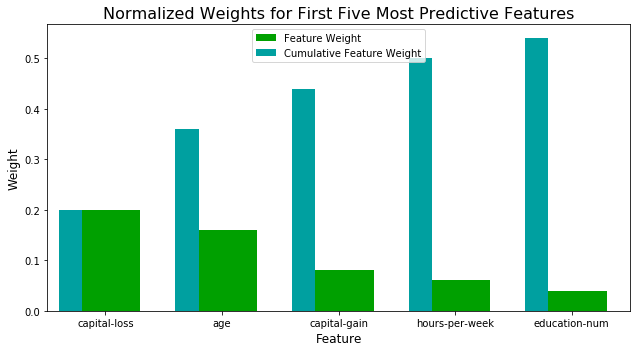

In [12]:
# TODO: Importar um modelo de aprendizado supervisionado que tenha 'feature_importances_'


# TODO: Treinar o modelo utilizando o conjunto de treinamento com .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extrair a importância dos atributos utilizando .feature_importances_ 
importances = model.feature_importances_

# Plotar
vs.feature_plot(importances, X_train, y_train)

### Questão 7 - Extraindo importância dos atributos

Observe a visualização criada acima que exibe os cinco atributos mais relevantes para predizer se um indivíduo possui remuneração igual ou superior à \$50,000 por ano.

* Como estes cinco atributos se comparam com os 5 atributos que você discutiu na **Questão 6**? 
* Se você estivesse próximo da mesma resposta, como esta visualização confirma o seu raciocínio? 
* Se você não estava próximo, por que você acha que estes atributos são mais relevantes? 

**Resposta:**

Entre os cinco atributos mais relevantes (capital-loss, age, capital-gain, hours-per-week, education-num) apenas dois estavam no meu conjunto (age, education-num é apenas um número para representar education-level).<br>
O atributo hours-per-week faz mais sentido em países em que o pagamento é feito por hora. Como no Brasil a maioria dos salários é pago por mês, a compreensão da importância desse atributo fica prejudicada.<br>
Os atributos 'capital-loss' e 'capital-gain' devem estar entre os mais importantes, pois a diferença entre eles nos dá a informação de quanto a pessoa realmente tem dispoível para poder ajudar a instituição.<br>

### Selecionando atributos

Como um modelo performa se nós só utilizamos um subconjunto de todos os atributos disponíveis nos dados? Com menos atributos necessários para treinar, a expectativa é que o treinamento e a predição sejam executados em um tempo muito menor — com o custo da redução nas métricas de performance. A partir da visualização acima, nós vemos que os cinco atributos mais importantes contribuem para mais de 50% da importância de **todos** os atributos presentes nos dados. Isto indica que nós podemos tentar *reduzir os atributos* e simplificar a informação necessária para o modelo aprender. O código abaixo utilizará o mesmo modelo otimizado que você encontrou anteriormente e treinará o modelo com o mesmo conjunto de dados de treinamento, porém apenas com *os cinco atributos mais importantes*

In [13]:
# Importar a funcionalidade para clonar um modelo
from sklearn.base import clone

# Reduzir a quantidade de atributos
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Treinar o melhor modelo encontrado com a busca grid anterior
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Fazer novas predições
reduced_predictions = clf.predict(X_test_reduced)

# Reportar os scores do modelo final utilizando as duas versões dos dados.
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8612
F-score on testing data: 0.7316

Final Model trained on reduced data
------
Accuracy on testing data: 0.8335
F-score on testing data: 0.6784


### Questão 8 - Efeitos da seleção de atributos

* Como o F-score do modelo final e o accuracy score do conjunto de dados reduzido utilizando apenas cinco atributos se compara aos mesmos indicadores utilizando todos os atributos? 
* Se o tempo de treinamento é uma variável importante, você consideraria utilizar os dados enxutos como seu conjunto de treinamento? 


**Resposta:**

Em um conjunto de dados reduzido, a precisão do modelo final e o f-score ainda são comparáveis aos resultados do conjunto de dados completo.<br>
A 'accuracy' é apenas 3.2% menor e o F-Score, 7.3%.<br>
Embora o Adaboost seja relativamente mais rápido do que um dos outros testados, eu ainda consideria o treinamento sobre os dados reduzidos (de acordo com os recursos) se o tempo de treinamento for um fator e tivermos mais pontos de treinamento para processar. Essa decisão também dependerá da importância da precisão e dos f-scores (ou se o f-score for mais importante que a precisão, já que a queda é maior do que a precisão), para tomar uma decisão final.

> **Nota**: Uma vez que você tenha concluído toda a implementação de código e respondido cada uma das questões acima, você poderá finalizar o seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima navegando para 
**File -> Download as -> HTML (.html)**. Inclua este documento junto do seu notebook como sua submissão.